# Tugas Besar Kelompok PML

Tugas Explorasi AutoML Vehicle

Anggota Kelompok:
1. Bellamy Bintang Pratama - 1301210266
2. Hadziq Umar Azka Mirza - 1301210516
3. Maritza Amalia Dwiputri - 1301213399
4. Muhammad Faqih Abdussalam - 1301213056

Url presentasi https://youtu.be/of7C6lfymyI


## Import Libraries

In [ ]:
# uncomment jika belum install tpot dan/atau niapy

# !pip install tpot
# !pip install niapy --pre

In [ ]:
# library untuk membuka data
import pandas as pd
from scipy.io import arff

# library untuk data exploration dan pre-processing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# library untuk training dan testing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import time

# tpot dan niapy
from tpot import TPOTClassifier
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import ParticleSwarmOptimization
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preparation

### Load Dataset

In [ ]:
# Load dataset
data, meta = arff.loadarff('vehicle.arff')
df = pd.DataFrame(data)

df['binaryClass'] = df['binaryClass'].apply(lambda x: x.decode('utf-8'))

### Data Exploration

In [ ]:
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,binaryClass
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,N
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,N
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,N
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,N
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,P


In [ ]:
df.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


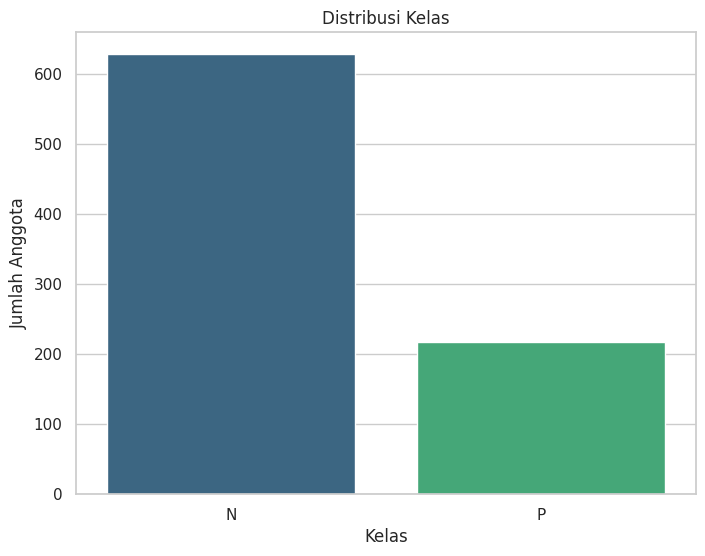

binaryClass
N    628
P    218
Name: count, dtype: int64


In [ ]:
class_counts = df['binaryClass'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Anggota')
plt.show()

print(class_counts)

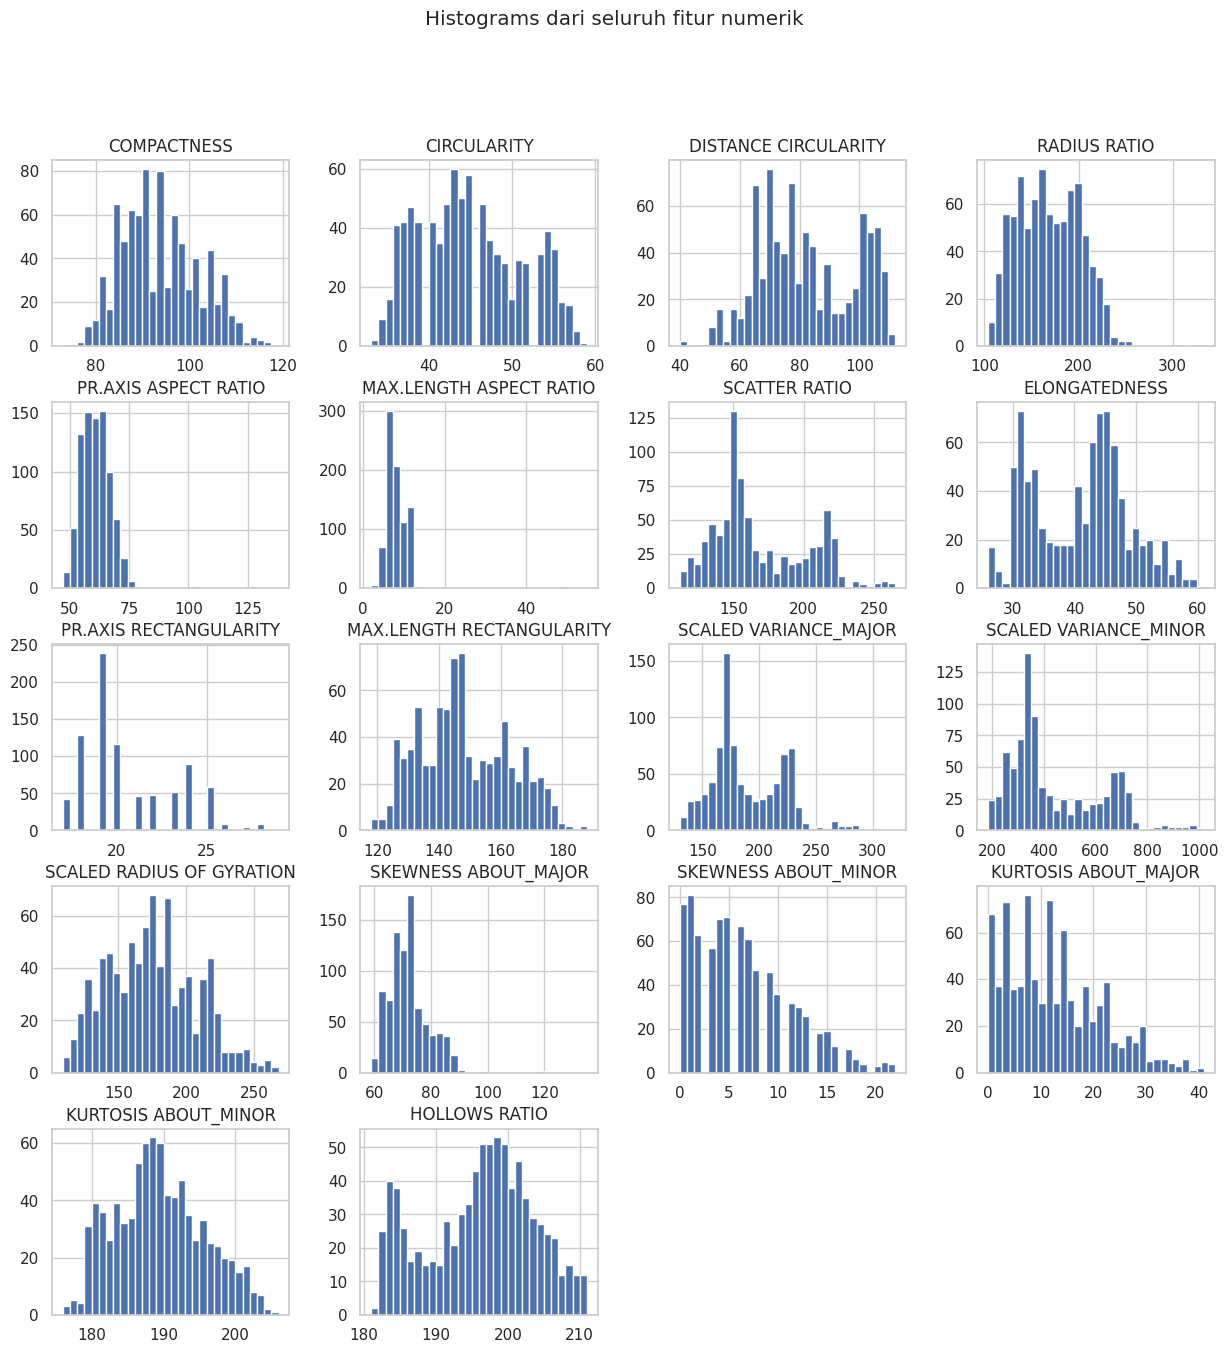

In [ ]:
sns.set(style="whitegrid")

df.hist(bins=30, figsize=(15, 15))
plt.suptitle('Histograms dari seluruh fitur numerik')
plt.show()

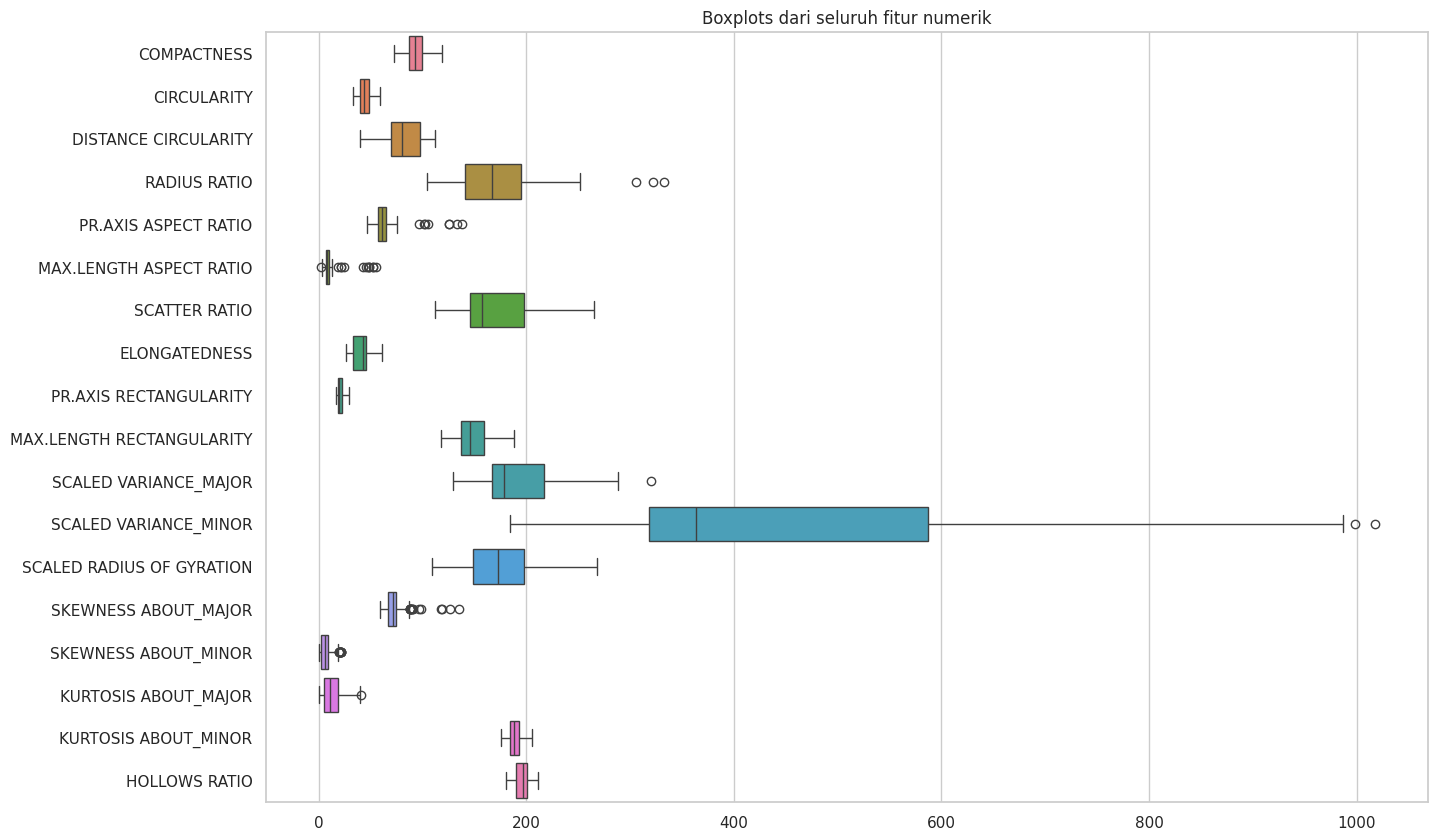

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['binaryClass']), orient='h')
plt.title('Boxplots dari seluruh fitur numerik')
plt.show()

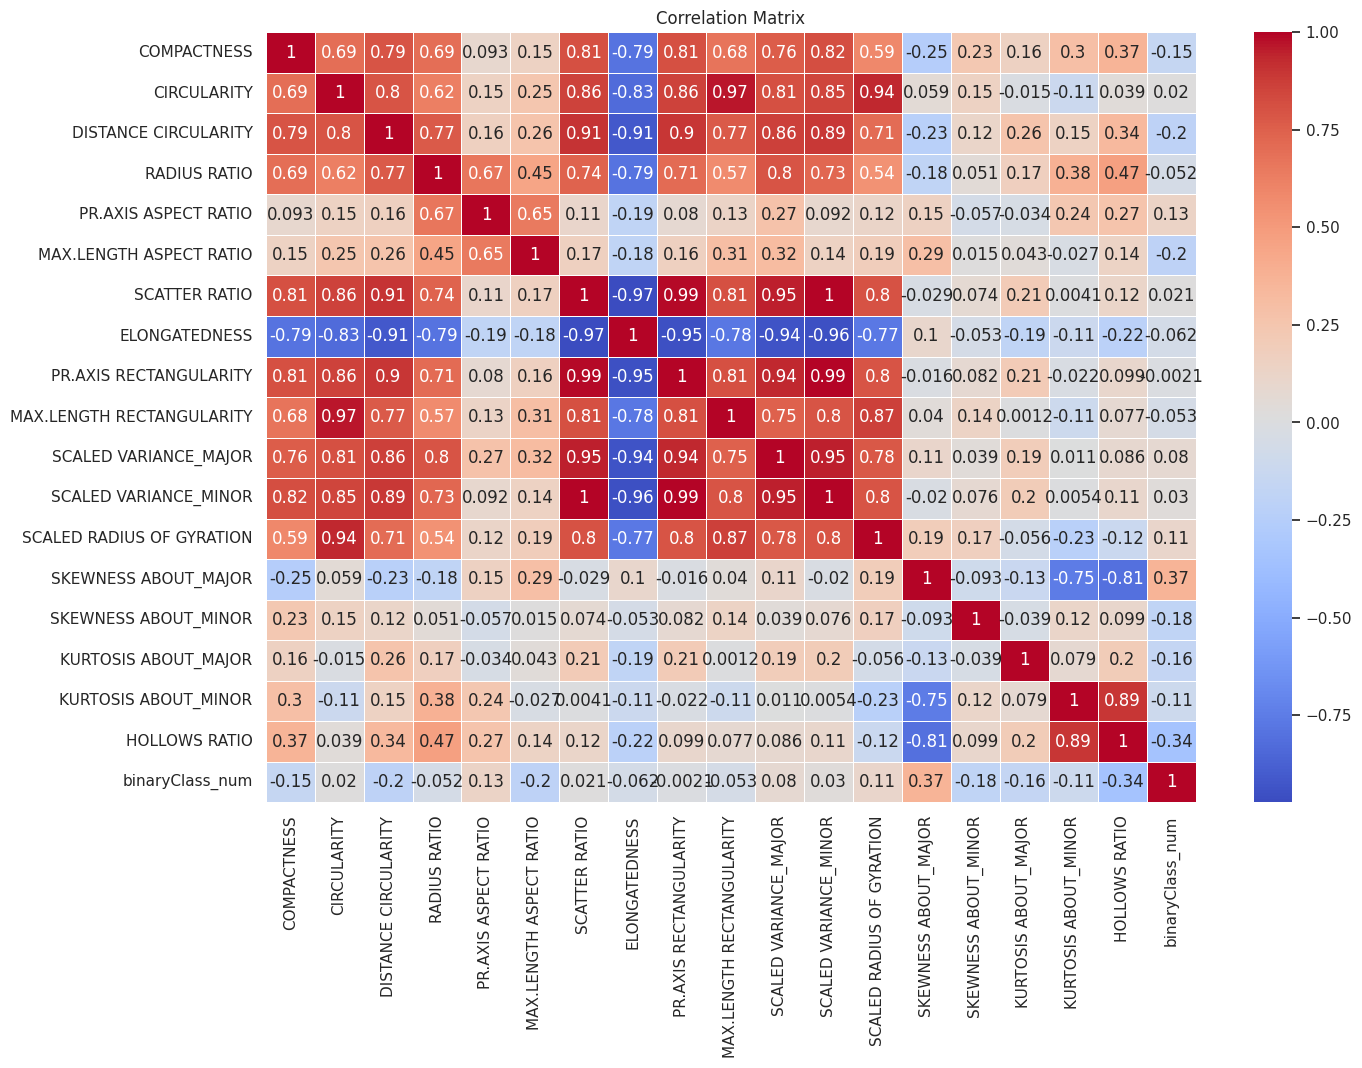

In [ ]:
label_encoder = LabelEncoder()
df['binaryClass_num'] = label_encoder.fit_transform(df['binaryClass'])

corr_matrix = df.drop(columns=['binaryClass']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
target_corr = corr_matrix['binaryClass_num'].sort_values(ascending=False)
print(target_corr)

binaryClass_num              1.000000
SKEWNESS ABOUT_MAJOR         0.367064
PR.AXIS ASPECT RATIO         0.129840
SCALED RADIUS OF GYRATION    0.113141
SCALED VARIANCE_MAJOR        0.080080
SCALED VARIANCE_MINOR        0.029972
SCATTER RATIO                0.020990
CIRCULARITY                  0.019789
PR.AXIS RECTANGULARITY      -0.002126
RADIUS RATIO                -0.051716
MAX.LENGTH RECTANGULARITY   -0.052675
ELONGATEDNESS               -0.061819
KURTOSIS ABOUT_MINOR        -0.107185
COMPACTNESS                 -0.149396
KURTOSIS ABOUT_MAJOR        -0.157645
SKEWNESS ABOUT_MINOR        -0.183754
MAX.LENGTH ASPECT RATIO     -0.199056
DISTANCE CIRCULARITY        -0.200670
HOLLOWS RATIO               -0.341308
Name: binaryClass_num, dtype: float64


## Data Pre Processing

### Outliers Removal

Fungsi remove_outliers adalah untuk menghapus outliers dari dataset. Outliers adalah titik data yang jauh dari kebanyakan data lainnya, bisa menjadi penyimpangan dari pola umum dalam dataset. Pendekatan yang umum digunakan untuk mengidentifikasi outliers adalah dengan menggunakan interquartile range (IQR). Dengan menggunakan pendekatan ini, data yang mungkin mengganggu atau tidak representatif dapat dihapus, meningkatkan kualitas analisis atau model yang akan dibangun dari dataset tersebut.

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Daftar fitur numerik untuk proses penghapusan outliers
numerical_features = df.columns[:-2]

# Menghapus outliers dari dataset
print(f"Shape of dataset before removing outliers: {df.shape}")
df_cleaned = remove_outliers(df, numerical_features)
print(f"Shape of dataset after removing outliers: {df_cleaned.shape}")


Shape of dataset before removing outliers: (846, 20)
Shape of dataset after removing outliers: (814, 20)


### Train Test Split and Normalization

Menyiapkan dataset untuk pelatihan dan evaluasi model pembelajaran mesin. Pertama, dataset dibagi menjadi fitur (X) dan target (y), di mana kolom 'binaryClass' dan 'binaryClass_num' dihapus dari fitur karena 'binaryClass' mungkin merupakan label target dalam bentuk kategori, sedangkan 'binaryClass_num' mungkin merupakan kode numerik untuk label tersebut. Selanjutnya, dataset dibagi menjadi data latih dan data uji dengan proporsi data uji sebesar 20%. Hal ini dilakukan untuk memastikan evaluasi yang obyektif terhadap model yang dilatih. Terakhir, fitur-fitur dalam dataset disesuaikan menggunakan penskalaan Min-Max untuk memastikan bahwa semua fitur memiliki skala yang serupa, yang penting untuk beberapa model pembelajaran mesin yang sensitif terhadap skala fitur. Dengan langkah-langkah ini, data sudah siap digunakan untuk melatih dan menguji model pembelajaran mesin.

In [ ]:
X = df.drop(columns=['binaryClass', 'binaryClass_num'])
y = df['binaryClass_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### TPOT

Parameter dari TPOT Classifier yang diubah adalah verbosity=2, generations=5, population_size=50, random_state=42.

* Verbosity digunakan untuk mengatur informasi apa saja yang akan ditampilkan di output ketika TPOT dijalankan. Angka 2 (dari skala 0 sampai 3) dipilih agar model menampilkan informasi yang detail namun tidak terlalu banyak yang dapat mendistraksi user.
* Generation adalah parameter yang berperan sebagai iterasi dari TPOT. Nilai default generation adalah 100, namun untuk mempersingkat waktu, generations hanya akan di set sebesar 50.
* Population size adalah jumlah individu yang ada pada tiap generasi. Nilai default dari population size adalah 100. Walaupun angka besar pada populasi dapat membantu variansi model namun angka yang besar juga akan menambah komputasi, sehingga population size hanya akan di set 50.
* Random state adalah parameter yang berfungsi untuk mengatur seed untuk generator angka acak yang digunakan oleh TPOT. Ini memastikan hasil yang dapat direproduksi dengan membuat proses acak dalam optimasi (misalnya, pembuatan populasi awal, seleksi, dan mutasi) menjadi deterministik. Angka 42 dipilih karena merupakan pilihan populer di komunitas data science.


In [ ]:
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42)
start_time_tpot = time.time()
tpot.fit(X_train_scaled, y_train)
end_time_tpot = time.time()

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9807734204793028

Generation 2 - Current best internal CV score: 0.9837363834422657

Generation 3 - Current best internal CV score: 0.9866884531590415

Generation 4 - Current best internal CV score: 0.9866884531590415

Generation 5 - Current best internal CV score: 0.9866884531590415

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

### NiaPy

Parameter dari Particle Swarm Optimization (PSO) digunakan untuk mengoptimalkan hyperparameter model RandomForestClassifier.
* Hyperparameter terbaik untuk n_estimators, max_depth, dan min_samples_split diekstrak dari hasil optimasi best dan dikonversi ke tipe integer.
* MinMaxScaler merupakan ormalisasi data dengan mengubah nilai fitur ke dalam rentang [0, 1]. Ini memastikan semua fitur memiliki skala yang sama.
* RandomForestClassifier dibangun dengan hyperparameter terbaik yang telah dioptimalkan. Parameter n_estimators, max_depth, dan min_samples_split diatur sesuai hasil optimasi, dan random_state=42 memastikan hasil yang dapat direproduksi.
* Fit melatih model pada data training yang telah dinormalisasi (X_train_scaled) dan label (y_train). Model RandomForestClassifier dilatih dengan menggunakan hyperparameter terbaik yang ditemukan oleh PSO, yang diharapkan meningkatkan kinerja model pada data yang tidak terlihat sebelumnya.

In [ ]:
class HyperparameterOptimization(Problem):
    def __init__(self):
        super().__init__(dimension=3, lower=[10, 1, 2], upper=[200, 50, 100], dtype=int)

    def _evaluate(self, x):
        n_estimators = int(x[0])
        max_depth = int(x[1])
        min_samples_split = int(x[2])

        model = make_pipeline(
            MinMaxScaler(),
            RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        )

        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

        return 1.0 - np.mean(scores)

start_time_niapy = time.time()
task = Task(problem=HyperparameterOptimization(), max_iters=50)
algo = ParticleSwarmOptimization()
best = algo.run(task)
end_time_niapy = time.time()

In [ ]:
best_n_estimators = int(best[0][0])
best_max_depth = int(best[0][1])
best_min_samples_split = int(best[0][2])

best_model = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
)
best_model.fit(X_train_scaled, y_train)

print(f"Best parameters found by NiaPy:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_depth: {best_max_depth}")
print(f"min_samples_split: {best_min_samples_split}")
print(f'Best accuracy: {1.0 - best[1]}')

Best parameters found by NiaPy:
n_estimators: 44
max_depth: 50
min_samples_split: 5
Best accuracy: 0.9866884531590413


## Evaluation

Metriks evaluasi yang dipakai adalah Accuracy beserta Confusion Matrix.

Accuracy (akurasi) adalah metrik evaluasi yang mengukur persentase prediksi yang benar dari keseluruhan prediksi. Ini dihitung dengan membagi jumlah prediksi benar (baik positif maupun negatif) dengan total jumlah prediksi.

Confusion Matrix adalah metrik evaluasi yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas. Matriks ini terdiri dari empat komponen utama:
* True Positives (TP): Jumlah data dengan kelas positif yang diklasifikasikan dengan benar sebagai positif.
* True Negatives (TN): Jumlah data dengan kelas negatif yang diklasifikasikan dengan benar sebagai negatif.
* False Positives (FP): Jumlah data dengan kelas negatif yang salah diklasifikasikan sebagai positif..
* False Negatives (FN): Jumlah data dengan kelas positif yang salah diklasifikasikan sebagai negatif.


### TPOT

In [ ]:
y_pred_tpot = tpot.predict(X_test_scaled)
accuracy_tpot = accuracy_score(y_test, y_pred_tpot)
conf_matrix_tpot = confusion_matrix(y_test, y_pred_tpot)


print(f"TPOT Time: {end_time_tpot - start_time_tpot}")
print(f"TPOT Accuracy: {accuracy_tpot}")
print(f"TPOT Confusion Matrix:\n{conf_matrix_tpot}")

TPOT Time: 316.06198716163635
TPOT Accuracy: 1.0
TPOT Confusion Matrix:
[[118   0]
 [  0  52]]


### NiaPy

In [ ]:
y_pred_niapy = best_model.predict(X_test_scaled)
accuracy_niapy = accuracy_score(y_test, y_pred_niapy)
conf_matrix_niapy = confusion_matrix(y_test, y_pred_niapy)

print(f"NiaPy Time: {end_time_niapy - start_time_niapy}")
print(f"NiaPy Accuracy: {accuracy_niapy}")
print(f"NiaPy Confusion Matrix:\n{conf_matrix_niapy}")

NiaPy Time: 1032.003620147705
NiaPy Accuracy: 0.9882352941176471
NiaPy Confusion Matrix:
[[118   0]
 [  2  50]]


## Eksplorasi lain

In [ ]:
tpot = TPOTClassifier(verbosity=2, generations=50, population_size=20, random_state=42)
start_time_tpot = time.time()
tpot.fit(X_train_scaled, y_train)

Optimization Progress:   0%|          | 0/1020 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9748583877995642

Generation 2 - Current best internal CV score: 0.9778431372549019

Generation 3 - Current best internal CV score: 0.9807734204793028

Generation 4 - Current best internal CV score: 0.9822549019607842

Generation 5 - Current best internal CV score: 0.9822549019607842

Generation 6 - Current best internal CV score: 0.9866884531590415

Generation 7 - Current best internal CV score: 0.9896405228758169

Generation 8 - Current best internal CV score: 0.9896405228758169

Generation 9 - Current best internal CV score: 0.9896405228758169

Generation 10 - Current best internal CV score: 0.9896405228758169

Generation 11 - Current best internal CV score: 0.9896405228758169

Generation 12 - Current best internal CV score: 0.9911220043572986

Generation 13 - Current best internal CV score: 0.9911220043572986

Generation 14 - Current best internal CV score: 0.9911220043572986

Generation 15 - Current best internal CV score: 0.991122

TPOTClassifier(generations=50, population_size=20, random_state=42, verbosity=2)

In [ ]:
y_pred_tpot = tpot.predict(X_test_scaled)
accuracy_tpot = accuracy_score(y_test, y_pred_tpot)
conf_matrix_tpot = confusion_matrix(y_test, y_pred_tpot)


print(f"TPOT Time: {end_time_tpot - start_time_tpot}")
print(f"TPOT Accuracy: {accuracy_tpot}")
print(f"TPOT Confusion Matrix:\n{conf_matrix_tpot}")

TPOT Time: 2282.112261533737
TPOT Accuracy: 0.9941176470588236
TPOT Confusion Matrix:
[[118   0]
 [  1  51]]
